# Sect4. Multi-variable linear regression

In [1]:
from tqdm.notebook import tqdm 
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


## Ex01. Multi-variable linear regression
### Predictin exam score
>regression using three inputs (x1, x2, x3)

#### Hypothesis
>$$ H(x) = Wx + b $$$$ H(x1, x2, x3) = w1 x1 + w2 x2 + w3 x3 + b $$
#### Cost function
>$$ H(x1, x2, x3) = w1 x1 + w2 x2 + w3 x3 + b $$

>$$ cost(W,b) = \frac{1}{m} \sum^m_{i=1}(H(x1^{(i)}, x2^{(i)}, x3^{(i)} )-y^{(i)})^2 $$

In [2]:
# import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x1_data = [73., 93., 89.,  96., 73.]
x2_data = [80., 88., 91.,  98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y  = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b  = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b
print(hypothesis)

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

Tensor("add_2:0", dtype=float32)


In [3]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm(range(2001)):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))

  0%|          | 0/2001 [00:00<?, ?it/s]


Step : 0 
Cost : 77437.828125 
Prediction :
[ -99.19784 -109.40472 -112.99919 -123.97137  -79.7757 ]

Step : 1 
Cost : 24279.19140625 
Prediction :
[ 9.473044 21.207357 15.696277 16.174658 19.847952]

Step : 2 
Cost : 7616.7783203125 
Prediction :
[70.314384 94.33191  87.74828  94.63738  75.6231  ]

Step : 3 
Cost : 2393.99365234375 
Prediction :
[104.37774 135.2713  128.08772 138.5659  106.84909]

Step : 4 
Cost : 756.9252319335938 
Prediction :
[123.44907 158.1914  150.67244 163.15997 124.3309 ]

Step : 5 
Cost : 243.7870330810547 
Prediction :
[134.12694 171.0232  163.31697 176.92944 134.11786]

Step : 6 
Cost : 82.94224548339844 
Prediction :
[140.10559 178.2069  170.39633 184.63858 139.59674]

Step : 7 
Cost : 32.522682189941406 
Prediction :
[143.45332 182.22841 174.35994 188.95477 142.6637 ]

Step : 8 
Cost : 16.715335845947266 
Prediction :
[145.32811 184.47957 176.57921 191.37138 144.3803 ]

Step : 9 
Cost : 11.757254600524902 
Prediction :
[146.37825 185.73953 177.82181 192.

### Ex02. Multi-variable matmul linear regression

#### Hypothesis using matrix
>$$ w1 x1 + w2 x2 + w3 x3 + ... + wn xn $$


>$$ [x_{1} x_{2} x_{3}] \times \begin{bmatrix} w_{1}\\ w_{2}\\ w_{3} \end{bmatrix} = [x_1 w_1 + x_2 w_2 + x_3 w_3] $$


>$$H(X) = XW$$

In [4]:
# import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75.], 
          [93., 88., 93.],
          [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]


# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [5]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))

  0%|          | 0/2001 [00:00<?, ?it/s]


Step : 0 
Cost : 105818.296875 
Prediction :
[[-133.5243 ]
 [-164.79396]
 [-160.21033]
 [-174.73906]
 [-126.36729]]

Step : 1 
Cost : 33173.4765625 
Prediction :
[[ -6.490195]
 [-12.106489]
 [ -9.765766]
 [-10.908591]
 [ -9.90481 ]]

Step : 2 
Cost : 10403.1865234375 
Prediction :
[[64.63107]
 [73.37793]
 [74.46248]
 [80.81395]
 [55.29867]]

Step : 3 
Cost : 3265.9052734375 
Prediction :
[[104.44882 ]
 [121.237816]
 [121.618645]
 [132.16594 ]
 [ 91.80412 ]]

Step : 4 
Cost : 1028.743896484375 
Prediction :
[[126.74086 ]
 [148.03314 ]
 [148.01952 ]
 [160.91591 ]
 [112.242615]]

Step : 5 
Cost : 327.5100402832031 
Prediction :
[[139.2209 ]
 [163.03517]
 [162.80026]
 [177.01187]
 [123.68577]]

Step : 6 
Cost : 107.70799255371094 
Prediction :
[[146.20757]
 [171.43456]
 [171.0753 ]
 [186.02328]
 [130.0928 ]]

Step : 7 
Cost : 38.80906677246094 
Prediction :
[[150.11868]
 [176.13737]
 [175.70807]
 [191.06834]
 [133.68027]]

Step : 8 
Cost : 17.210224151611328 
Prediction :
[[152.30794]
 [1

### Ex03. File input linear regression
#### Loading Data File

In [6]:
# import tensorflow as tf
# import numpy as np

tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('./data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print("x_data.shape : {}, \tlen(x_data) : {} \nx_data : \n{}".format(x_data.shape, len(x_data), x_data))
print("-"*25)
print("y_data.shape : {}  \ny_data : \n{}".format(y_data.shape, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

x_data.shape : (25, 3), 	len(x_data) : 25 
x_data : 
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
-------------------------
y_data.shape : (25, 1)  
y_data : 
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [7]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))

  0%|          | 0/2001 [00:00<?, ?it/s]


Step : 0 
Cost : 211.6978759765625 
Prediction :
[[146.40254]
 [177.59459]
 [174.47066]
 [185.3654 ]
 [139.80957]
 [ 96.34184]
 [131.57137]
 [ 87.39416]
 [160.80339]
 [138.98361]
 [132.02577]
 [129.19789]
 [184.98274]
 [160.57907]
 [131.92613]
 [175.66246]
 [159.08739]
 [154.4699 ]
 [176.84369]
 [157.26933]
 [156.07466]
 [162.03996]
 [149.99529]
 [158.60556]
 [185.93338]]

Step : 1 
Cost : 156.012451171875 
Prediction :
[[149.8618  ]
 [181.75455 ]
 [178.5682  ]
 [189.83012 ]
 [142.98096 ]
 [ 98.683655]
 [134.91608 ]
 [ 89.87735 ]
 [164.6944  ]
 [142.59271 ]
 [135.24658 ]
 [132.37552 ]
 [189.2138  ]
 [164.09332 ]
 [135.28677 ]
 [179.88577 ]
 [162.43227 ]
 [158.48471 ]
 [180.87671 ]
 [160.87813 ]
 [159.99637 ]
 [165.94458 ]
 [153.73352 ]
 [162.08813 ]
 [190.24332 ]]

Step : 2 
Cost : 135.37112426757812 
Prediction :
[[151.96439]
 [184.2839 ]
 [181.05905]
 [192.54509]
 [144.90875]
 [100.10862]
 [136.95099]
 [ 91.38955]
 [167.0615 ]
 [144.79034]
 [137.20552]
 [134.30891]
 [191.785  ]
 [16


Step : 1500 
Cost : 47.94133377075195 
Prediction :
[[153.1405 ]
 [187.62315]
 [183.15099]
 [197.3306 ]
 [145.86562]
 [104.90951]
 [143.7235 ]
 [100.81329]
 [173.6935 ]
 [156.6492 ]
 [141.72888]
 [140.58078]
 [191.40747]
 [162.45174]
 [144.70056]
 [188.05653]
 [158.41748]
 [170.19385]
 [182.27185]
 [162.37405]
 [169.70758]
 [173.77902]
 [162.11295]
 [159.48792]
 [194.83733]]

Step : 1600 
Cost : 45.280399322509766 
Prediction :
[[153.05965]
 [187.57811]
 [183.06982]
 [197.36282]
 [145.74467]
 [105.01267]
 [143.91254]
 [101.18239]
 [173.81093]
 [157.02942]
 [141.8026 ]
 [140.72276]
 [191.20071]
 [162.11047]
 [144.9116 ]
 [188.1211 ]
 [157.96202]
 [170.48488]
 [182.0475 ]
 [162.18962]
 [169.89377]
 [173.85135]
 [162.25162]
 [159.12099]
 [194.72543]]

Step : 1700 
Cost : 42.80252456665039 
Prediction :
[[152.9841  ]
 [187.53279 ]
 [182.99222 ]
 [197.39438 ]
 [145.62564 ]
 [105.1094  ]
 [144.09607 ]
 [101.540695]
 [173.921   ]
 [157.39204 ]
 [141.87376 ]
 [140.85753 ]
 [191.00221 ]
 [161.

In [16]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        # print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))
        print("Step : {} \tCost : {} ".format(step, cost_val))

  0%|          | 0/2001 [00:00<?, ?it/s]

Step : 0 	Cost : 211.6978759765625 
Step : 1 	Cost : 156.012451171875 
Step : 2 	Cost : 135.37112426757812 
Step : 3 	Cost : 127.68655395507812 
Step : 4 	Cost : 124.7925033569336 
Step : 5 	Cost : 123.66974639892578 
Step : 6 	Cost : 123.20184326171875 
Step : 7 	Cost : 122.97607421875 
Step : 8 	Cost : 122.83995056152344 
Step : 9 	Cost : 122.7370376586914 
Step : 100 	Cost : 115.38525390625 
Step : 200 	Cost : 107.88755798339844 
Step : 300 	Cost : 100.94047546386719 
Step : 400 	Cost : 94.50140380859375 
Step : 500 	Cost : 88.53114318847656 
Step : 600 	Cost : 82.99374389648438 
Step : 700 	Cost : 77.85584259033203 
Step : 800 	Cost : 73.08719635009766 
Step : 900 	Cost : 68.6595687866211 
Step : 1000 	Cost : 64.54707336425781 
Step : 1100 	Cost : 60.72591781616211 
Step : 1200 	Cost : 57.174232482910156 
Step : 1300 	Cost : 53.871726989746094 
Step : 1400 	Cost : 50.799766540527344 
Step : 1500 	Cost : 47.94133377075195 
Step : 1600 	Cost : 45.280399322509766 
Step : 1700 	Cost : 

>prediction

In [17]:
# Ask score
print("Your score \t: \n", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

Your score 	: 
 [[189.7708]]


In [18]:
# Ask score many
print("\nOther scores \t: \n", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


Other scores 	: 
 [[135.22493]
 [186.95398]]


### Ex04. TF reader linear regression 5
>참조 : https://www.tensorflow.org/programmers_guide/reading_data

In [19]:
# import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

filename_queue = tf.train.string_input_producer(
    ['./data/data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the decoded result.
# Convert CSV records to tensors. Each column maps to one tensor.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

# collect batches of csv in
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TextLineDataset`.
Instructions for updating:
Queue-base

In [20]:
train_x_batch

<tf.Tensor 'batch:0' shape=(10, 3) dtype=float32>

In [21]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

Step_val = []
Cost_val = []

for step in tqdm(range(2001)):

    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    

    Step_val.append(step)
    Cost_val.append(cost_val)
    
    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))

coord.request_stop()
coord.join(threads)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.


  0%|          | 0/2001 [00:00<?, ?it/s]


Step : 0 
Cost : 195986.015625 
Prediction :
[[-270.7529 ]
 [-330.78342]
 [-323.07275]
 [-354.08548]
 [-251.55775]
 [-189.12744]
 [-266.54678]
 [-199.6378 ]
 [-312.901  ]
 [-294.96216]]

Step : 1 
Cost : 82031.734375 
Prediction :
[[-109.22567 ]
 [-110.70615 ]
 [-138.60141 ]
 [-112.37547 ]
 [-115.613945]
 [-144.61325 ]
 [-105.97183 ]
 [-137.2986  ]
 [-130.98395 ]
 [-116.93756 ]]

Step : 2 
Cost : 34030.09765625 
Prediction :
[[-14.042246 ]
 [-14.528074 ]
 [-12.305712 ]
 [ -2.176424 ]
 [-12.414537 ]
 [ -6.9951077]
 [-13.681784 ]
 [-10.674955 ]
 [-13.840246 ]
 [ -9.710695 ]]

Step : 3 
Cost : 8367.861328125 
Prediction :
[[37.74033 ]
 [57.469643]
 [40.566784]
 [64.15279 ]
 [54.320793]
 [56.07813 ]
 [52.24293 ]
 [78.90481 ]
 [68.46664 ]
 [56.73269 ]]

Step : 4 
Cost : 4838.4287109375 
Prediction :
[[109.560356]
 [ 95.95134 ]
 [104.1617  ]
 [112.15493 ]
 [100.615974]
 [101.99678 ]
 [101.04988 ]
 [ 98.32522 ]
 [101.14023 ]
 [115.25831 ]]

Step : 5 
Cost : 1476.5714111328125 
Prediction :
[

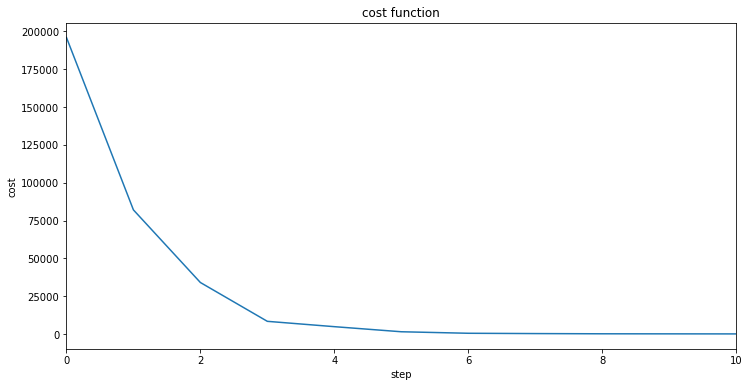

In [22]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]

# Show the cost function
plt.plot(Step_val, Cost_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('cost')
plt.xlim(0,10)
plt.show()

>prediction

In [23]:
# Ask score
print("Your score \t: \n", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

Your score 	: 
 [[181.03897]]


In [24]:
# Ask score many
print("\nOther scores \t: \n", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


Other scores 	: 
 [[160.35745]
 [183.96512]]
